In [ ]:
from langchain_groq import ChatGroq
llm = ChatGroq(
    model_name="deepseek-r1-distill-llama-70b",
    temperature=0
)
response=llm.invoke("what is length of wall of china?")


In [2]:
response

AIMessage(content="<think>\nOkay, so I need to figure out the length of the Great Wall of China. I remember hearing that it's really long, but I'm not exactly sure how long. I think it's somewhere in the thousands of miles, but I'm not certain. Let me try to break this down.\n\nFirst, I know the Great Wall is a series of fortifications built across several Chinese dynasties. It wasn't built all at once, so maybe that's why the length can vary. I've heard different numbers before, like 13,000 miles or 21,000 kilometers. But I'm not sure which one is accurate.\n\nI should consider the sources of this information. Maybe some people measure it differently. For example, if you include all the branches and sections, it might add up to a longer distance. But if you just take the main wall, it might be shorter. I think the Chinese government did a survey a while back, so that might be a reliable source.\n\nWait, I think they used advanced technology like GPS and satellites to measure it more a

In [3]:
response.content

"<think>\nOkay, so I need to figure out the length of the Great Wall of China. I remember hearing that it's really long, but I'm not exactly sure how long. I think it's somewhere in the thousands of miles, but I'm not certain. Let me try to break this down.\n\nFirst, I know the Great Wall is a series of fortifications built across several Chinese dynasties. It wasn't built all at once, so maybe that's why the length can vary. I've heard different numbers before, like 13,000 miles or 21,000 kilometers. But I'm not sure which one is accurate.\n\nI should consider the sources of this information. Maybe some people measure it differently. For example, if you include all the branches and sections, it might add up to a longer distance. But if you just take the main wall, it might be shorter. I think the Chinese government did a survey a while back, so that might be a reliable source.\n\nWait, I think they used advanced technology like GPS and satellites to measure it more accurately. That wo

In [4]:
from langchain.tools import tool

## this is my custom tools

In [5]:
from langchain.tools import tool

@tool
def multiply(a: int, b: int) -> int:
    """
    Multiply two integers.

    Args:
        a (int): The first integer.
        b (int): The second integer.

    Returns:
        int: The product of a and b.
    """
    return a * b

@tool
def add(a: int, b: int) -> int:
    """
    Add two integers.

    Args:
        a (int): The first integer.
        b (int): The second integer.

    Returns:
        int: The sum of a and b.
    """
    return a + b

@tool
def divide(a: int, b: int) -> float:
    """
    Divide two integers.

    Args:
        a (int): The numerator.
        b (int): The denominator (must not be 0).

    Returns:
        float: The result of division.
    """
    if b == 0:
        raise ValueError("Denominator cannot be zero.")
    return a / b

## importing the inbuilt tool

In [6]:
from langchain_community.tools import DuckDuckGoSearchRun
search=DuckDuckGoSearchRun()

In [7]:
search.invoke("what is the latest update on iphone17 release?")

"Some iPhone 17 models (maybe even all of them) will have a new camera bump, a wide rectangular raised area that stretches across the phone similar in style to Google's Pixel line. According to a ... Planned for September 2025, the iPhone 17 models could feature larger display sizes, ProMotion across the lineup, Wi-Fi 7, and more. We're still in the middle of the iPhone 16 release cycle, but ... The iPhone 17 is already shaping up to be one of its biggest updates in years. From the ultra-slim iPhone 17 Air to a new matte finish, upgraded front cameras, a possible sky blue model and more ... • The iPhone 17's display may not match what the Pro model offers. • iOS 26, Apple's iPhone software update for later this year, got a preview at WWDC. • The iPhone 17 could support a new ... New iPhone 17 colors. Rumors of a new color for the iPhone started in April, when Twitter user and leaker Majin Bu (not the Dragon Ball Z character) posted that the iPhone 17 Pro and Pro Max could ..."

In [8]:
# !pip install duckduckgo_search


In [9]:
tools=[multiply, add, divide, search]

In [10]:
llm_with_tools=llm.bind_tools(tools)

In [11]:
response=llm_with_tools.invoke("hi")

In [12]:
response.content

'Hello! How can I assist you today?'

In [13]:
response.tool_calls

[]

In [14]:
response=llm_with_tools.invoke("what is 2+2?")

In [15]:
response.content

''

In [16]:
response.tool_calls

[{'name': 'add',
  'args': {'a': 2, 'b': 2},
  'id': 'dz85h0k1y',
  'type': 'tool_call'}]

In [17]:
response=llm_with_tools.invoke("what is 10/2?")

In [18]:
response.content

''

In [19]:
response.tool_calls

[{'name': 'divide',
  'args': {'a': 10, 'b': 2},
  'id': '63v7jk188',
  'type': 'tool_call'}]

In [20]:
response=llm_with_tools.invoke("what is a current age of the TATA Group?")

In [21]:
response

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 't69p2js37', 'function': {'arguments': '{"query":"TATA Group founding year"}', 'name': 'duckduckgo_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 417, 'prompt_tokens': 402, 'total_tokens': 819, 'completion_time': 1.6505023570000001, 'prompt_time': 0.033888304, 'queue_time': 0.056907276, 'total_time': 1.6843906610000001}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--11ad2cde-f05a-4f47-8bae-2baebcc2fc7a-0', tool_calls=[{'name': 'duckduckgo_search', 'args': {'query': 'TATA Group founding year'}, 'id': 't69p2js37', 'type': 'tool_call'}], usage_metadata={'input_tokens': 402, 'output_tokens': 417, 'total_tokens': 819})

In [22]:
response.content

''

In [23]:
response.tool_calls

[{'name': 'duckduckgo_search',
  'args': {'query': 'TATA Group founding year'},
  'id': 't69p2js37',
  'type': 'tool_call'}]

In [24]:
# class MessagesState(TypedDict):
#     messages: Annotated[list[AnyMessage], add_messages]

In [25]:
SYSTEM_PROMPT="You are a helpful assistant tasked with using search and performing arithmetic on a set of inputs."



In [26]:
user_query=["tell me what is 2+2"]

In [27]:
[SYSTEM_PROMPT]+user_query

['You are a helpful assistant tasked with using search and performing arithmetic on a set of inputs.',
 'tell me what is 2+2']

In [28]:
from langchain_core.messages import HumanMessage, SystemMessage
from langgraph.graph import MessagesState,StateGraph, END, START

In [29]:
def function_1(state:MessagesState):
    
    user_question=state["messages"]
    
    input_question = [SYSTEM_PROMPT]+user_question
    
    response = llm_with_tools.invoke(input_question)
    
    return {
        "messages":[response]
    }

In [30]:
builder=StateGraph(MessagesState)

In [31]:
builder.add_node("llm_decision_step",function_1)

In [32]:
tools

[StructuredTool(name='multiply', description='Multiply two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The product of a and b.', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x000002148AF4B760>),
 StructuredTool(name='add', description='Add two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The sum of a and b.', args_schema=<class 'langchain_core.utils.pydantic.add'>, func=<function add at 0x000002148B033D00>),
 StructuredTool(name='divide', description='Divide two integers.\n\nArgs:\n    a (int): The numerator.\n    b (int): The denominator (must not be 0).\n\nReturns:\n    float: The result of division.', args_schema=<class 'langchain_core.utils.pydantic.divide'>, func=<function divide at 0x000002148B084EE0>),
 DuckDuckGoSearchRun(api_wrapper=DuckDuckGoSearchAPIWrapper(region='wt-wt', safesearch='moderate', time='y', 

In [33]:
from langgraph.prebuilt import ToolNode
builder.add_node("tools",ToolNode(tools))

In [34]:
builder.add_edge(START,"llm_decision_step")

In [35]:
from langgraph.prebuilt import tools_condition
builder.add_conditional_edges(
    "llm_decision_step",
    tools_condition,
)


In [36]:
builder.add_edge("tools","llm_decision_step")

In [37]:
react_graph=builder.compile()

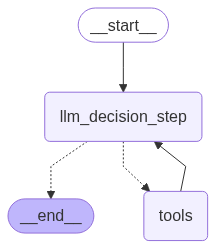

In [38]:
from IPython.display import Image, display
display(Image(react_graph.get_graph().draw_mermaid_png()))

In [39]:
message=[HumanMessage(content="What is 2 times of narendramodi's age?")]

In [40]:
react_graph.invoke({"messages":message})

{'messages': [HumanMessage(content="What is 2 times of narendramodi's age?", additional_kwargs={}, response_metadata={}, id='5920892f-e203-437e-aa91-31a10788df83'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'pyr6ep57c', 'function': {'arguments': '{"query":"Narendra Modi age"}', 'name': 'duckduckgo_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 296, 'prompt_tokens': 423, 'total_tokens': 719, 'completion_time': 1.102456617, 'prompt_time': 0.036669524, 'queue_time': 0.05394124499999999, 'total_time': 1.139126141}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--605c990f-668f-4a09-99b3-ee6f534cd989-0', tool_calls=[{'name': 'duckduckgo_search', 'args': {'query': 'Narendra Modi age'}, 'id': 'pyr6ep57c', 'type': 'tool_call'}], usage_metadata={'input_tokens': 423, 'output_tokens': 296, 'total_tokens': 719}),
  ToolMessage(content='Nar

In [41]:
message = [HumanMessage(content="How much is the net worth of Elon Musk, and divide it by 2?")]

In [42]:
react_graph.invoke({"messages":message})

{'messages': [HumanMessage(content='How much is the net worth of Elon Musk, and divide it by 2?', additional_kwargs={}, response_metadata={}, id='2321bd18-70c4-4fbd-9484-438510488ce5'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '3j6q1gmxz', 'function': {'arguments': '{"query":"Elon Musk net worth 2023"}', 'name': 'duckduckgo_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 562, 'prompt_tokens': 427, 'total_tokens': 989, 'completion_time': 2.167539314, 'prompt_time': 0.027347336, 'queue_time': 0.059455124, 'total_time': 2.19488665}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--3a21eb9b-5941-4c7e-982c-c9108c63d69f-0', tool_calls=[{'name': 'duckduckgo_search', 'args': {'query': 'Elon Musk net worth 2023'}, 'id': '3j6q1gmxz', 'type': 'tool_call'}], usage_metadata={'input_tokens': 427, 'output_tokens': 562, 'total_tokens': 989}),


In [43]:
message = [HumanMessage(content="What is the speed of light in m/s and multiply it by 10?")]

In [44]:
response=react_graph.invoke({"messages":message})

In [45]:
response["messages"][-1].content

'The speed of light is approximately 299,792,000 meters per second. When multiplied by 10, the result is 2,997,920,000 meters per second.\n\n**Step-by-Step Explanation:**\n\n1. **Identify the Speed of Light:** The speed of light in a vacuum is a constant value, approximately 299,792,000 meters per second (m/s).\n\n2. **Multiply by 10:** To find the speed of light multiplied by 10, perform the multiplication:\n   \\[\n   299,792,000 \\, \\text{m/s} \\times 10 = 2,997,920,000 \\, \\text{m/s}\n   \\]\n\n3. **Present the Result:** The speed of light multiplied by 10 is 2,997,920,000 meters per second.\n\n**Answer:** 2,997,920,000 m/s'

In [46]:
for m in response["messages"]:
    m.pretty_print()

================================ Human Message =================================

What is the speed of light in m/s and multiply it by 10?
================================== Ai Message ==================================
Tool Calls:
  multiply (a3csnz682)
 Call ID: a3csnz682
  Args:
    a: 299792000
    b: 10
================================= Tool Message =================================
Name: multiply

2997920000
================================== Ai Message ==================================

The speed of light is approximately 299,792,000 meters per second. When multiplied by 10, the result is 2,997,920,000 meters per second.

**Step-by-Step Explanation:**

1. **Identify the Speed of Light:** The speed of light in a vacuum is a constant value, approximately 299,792,000 meters per second (m/s).

2. **Multiply by 10:** To find the speed of light multiplied by 10, perform the multiplication:
   \[
   299,792,000 \, \text{m/s} \times 10 = 2,997,920,000 \, \text{m/s}
   \]

3. **Present 

In [47]:
import yfinance as yf

In [48]:
@tool
def get_stock_price(ticker:str)->str:
    """
    Fetches the previous closing price of a given stock ticker from Yahoo Finance.

    Args:
        ticker (str): The stock ticker symbol (e.g., 'AAPL', 'TSLA', 'NIFTY.BO').

    Returns:
        str: A message with the stock's previous closing price.
    """
    try:
        stock = yf.Ticker(ticker)
        price = stock.info.get('previousClose')
        if price is None:
            return f"Could not fetch price for ticker '{ticker}'."
        return f"The last closing price of {ticker.upper()} was ${price:.2f}."
    except Exception as e:
        return f"An error occurred while fetching stock data: {str(e)}"
     
    

In [49]:
get_stock_price.invoke("AAPL")

'The last closing price of AAPL was $199.20.'

In [50]:
get_stock_price.invoke("TSLA")

'The last closing price of TSLA was $319.11.'

In [51]:
tools

[StructuredTool(name='multiply', description='Multiply two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The product of a and b.', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x000002148AF4B760>),
 StructuredTool(name='add', description='Add two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The sum of a and b.', args_schema=<class 'langchain_core.utils.pydantic.add'>, func=<function add at 0x000002148B033D00>),
 StructuredTool(name='divide', description='Divide two integers.\n\nArgs:\n    a (int): The numerator.\n    b (int): The denominator (must not be 0).\n\nReturns:\n    float: The result of division.', args_schema=<class 'langchain_core.utils.pydantic.divide'>, func=<function divide at 0x000002148B084EE0>),
 DuckDuckGoSearchRun(api_wrapper=DuckDuckGoSearchAPIWrapper(region='wt-wt', safesearch='moderate', time='y', 

In [52]:
tools = [add, multiply, divide, search,get_stock_price]

In [53]:
llm_with_tools=llm.bind_tools(tools)

In [54]:
response=llm_with_tools.invoke("can you give me a latest stock price of adani greens?")

In [55]:
response.content

''

In [56]:
response.tool_calls

[{'name': 'get_stock_price',
  'args': {'ticker': 'ADANIGREEN.NS'},
  'id': 'y23dz1f1x',
  'type': 'tool_call'}]

In [57]:
SYSTEM_PROMPT = SystemMessage(
    content="You are a helpful assistant tasked with using search, the yahoo finance tool and performing arithmetic on a set of inputs."
)
def function_1(state:MessagesState):
    
    user_question=state["messages"]
    
    input_question = [SYSTEM_PROMPT]+user_question
    
    response = llm_with_tools.invoke(input_question)
    
    return {
        "messages":[response]
    }

In [58]:
workflow = StateGraph(MessagesState)
workflow.add_node("llm_decision_step", function_1)
workflow.add_node("tools", ToolNode(tools))
workflow.add_edge(START, "llm_decision_step")
workflow.add_conditional_edges(
    "llm_decision_step",
    tools_condition,
)
workflow.add_edge("tools", "llm_decision_step")
react_graph2 = workflow.compile()

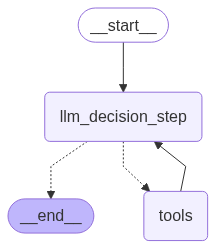

In [59]:
display(Image(react_graph2.get_graph(xray=True).draw_mermaid_png()))

In [60]:
messages = [HumanMessage(content="add 1000 in the current stock price of Apple.")]
messages = react_graph2.invoke({"messages": messages})

BadRequestError: Error code: 400 - {'error': {'message': "Failed to call a function. Please adjust your prompt. See 'failed_generation' for more details.", 'type': 'invalid_request_error', 'code': 'tool_use_failed', 'failed_generation': '<tool_call>{"name":"add","arguments":{"a":1000,"b":199.2}}</tool_call>'}}

In [ ]:
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

add 1000 in the current stock price of Apple.
================================== Ai Message ==================================
Tool Calls:
  get_stock_price (tebq6ktrt)
 Call ID: tebq6ktrt
  Args:
    ticker: AAPL
================================= Tool Message =================================
Name: get_stock_price

The last closing price of AAPL was $199.20.
================================== Ai Message ==================================
Tool Calls:
  add (vxnp5k39n)
 Call ID: vxnp5k39n
  Args:
    a: 1000
    b: 199
================================= Tool Message =================================
Name: add

1199
================================== Ai Message ==================================

<tool_call> The total is 1199.


In [ ]:
messages = [HumanMessage(content="can you give me 2 times of current stock price of Apple with the latest news of the Apple.")]
messages = react_graph2.invoke({"messages": messages})

In [ ]:
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

can you give me 2 times of current stock price of Apple with the latest news of the Apple.
================================== Ai Message ==================================
Tool Calls:
  get_stock_price (dkvyz3717)
 Call ID: dkvyz3717
  Args:
    ticker: AAPL
================================= Tool Message =================================
Name: get_stock_price

The last closing price of AAPL was $199.20.
================================== Ai Message ==================================
Tool Calls:
  get_stock_price (44rn4a6n0)
 Call ID: 44rn4a6n0
  Args:
    ticker: AAPL
================================= Tool Message =================================
Name: get_stock_price

The last closing price of AAPL was $199.20.
================================== Ai Message ==================================
Tool Calls:
  get_stock_price (w73514cxw)
 Call ID: w73514cxw
  Args:
    ticker: AAPL
===========================

In [ ]:
next class:
1. human in loop
2. agentic RAG
3. multiagent system(collabation and supervisor)
4. some mislionoius concept of the langgraph: sub graph, parllal execution etc

In [ ]:
Assignment:
    
AI Travel Agent & Expense Planner(Purpose: Trip planning for any city worldwide with Realtime data.")

• Real-time weather information
• Top attractions and activities
• Hotel cost calculation (per day × total days)
• Currency conversion to user's native currency
• Complete itinerary generation
• Total expense calculation
• generate a summary of the entire output

user_input
  |
search attraction and activity
1. search attracation
2. search restaurant
3. search activity
4. search transportation
  |
search weather forcasting
1. get current weather
2. get weather forcast
  |
search hotel costs
1. search hotel
2. estimate the hotel cost
3. budget_range
  |
calculate total cost
1. add
2. multiply
3. calculated total cost
4. calcualte the daily budget
    | 
currency_converion
1. get exchnage rate
2. convert currancy
    | 
Itinery generation
1. get day plan
2. crete full itinery
    |
create Trip Summary
    |
Retun complete traval plan

Note: if you know the OOPS then design this entire system using object and class in modular fashion.


deadline is till next friday 9PM IST


 everyone you can submit the assignments in this form. MAke sure to have one GitHub link and put all the assignments there https://forms.gle/g8RZ4qx8yvNcih4B7    
    